# HTTLPR Citation Bias

#### this program runs through the HTTLPR Citation Bias data set. It uses iGraph to give out a png called week6. The program uses one

In [1]:
import igraph
from igraph import * #importing everything in igraph
import igraph as ig
import pandas  #dataframe library
import numpy  #numeric python, basically gives you matrices
import itertools

In [3]:
data = pandas.read_csv("data.csv") #reading the .csv file (excel spreadsheet)
new = pandas.DataFrame(numpy.zeros(shape=(73, 73)), columns=data['Study'], index=data['Study']) #making a data frame

In [4]:
for a in data['Study']:
    for b, v in zip(data['Study'],data[a]):  #pairs the two lists together
        if v == 'X':
            new.at[a, b] = 1 #filling the new data frame with a 1 if they have an X


In [5]:
g = igraph.Graph.Adjacency((new.values > 0).tolist())  #new.values is a numpy array stored in the data frame

In [6]:
g.vs["label"] = new.index
g.vs["Year"] = data['Year']
g.vs["YearOnline"] = data['YearOnline']
g.vs["Outcome"] = data['Outcome']
g.vs["Abstract"] = data['Abstract'] #all of this section is just assigning the labels and the different attributes to each other

In [7]:
visual_style = {}

In [8]:
out_name = "week6.png"

In [9]:
visual_style["bbox"] = (2200, 2200)

visual_style["margin"] = 27

visual_style["vertex_size"] = 50

visual_style["vertex_label_size"] = 30

visual_style["edge_curved"] = False

In [10]:
#https://igraph.org/python/doc/igraph.drawing.colors.RainbowPalette-class.html
num_colors = max(g.degree()) + 1
palette = ig.RainbowPalette(n=num_colors) #can change the different parameters and class but rainbow is prettiest
color_list = [palette.get(degree) for degree in g.degree()] #g is my graph
visual_style["vertex_color"] = color_list

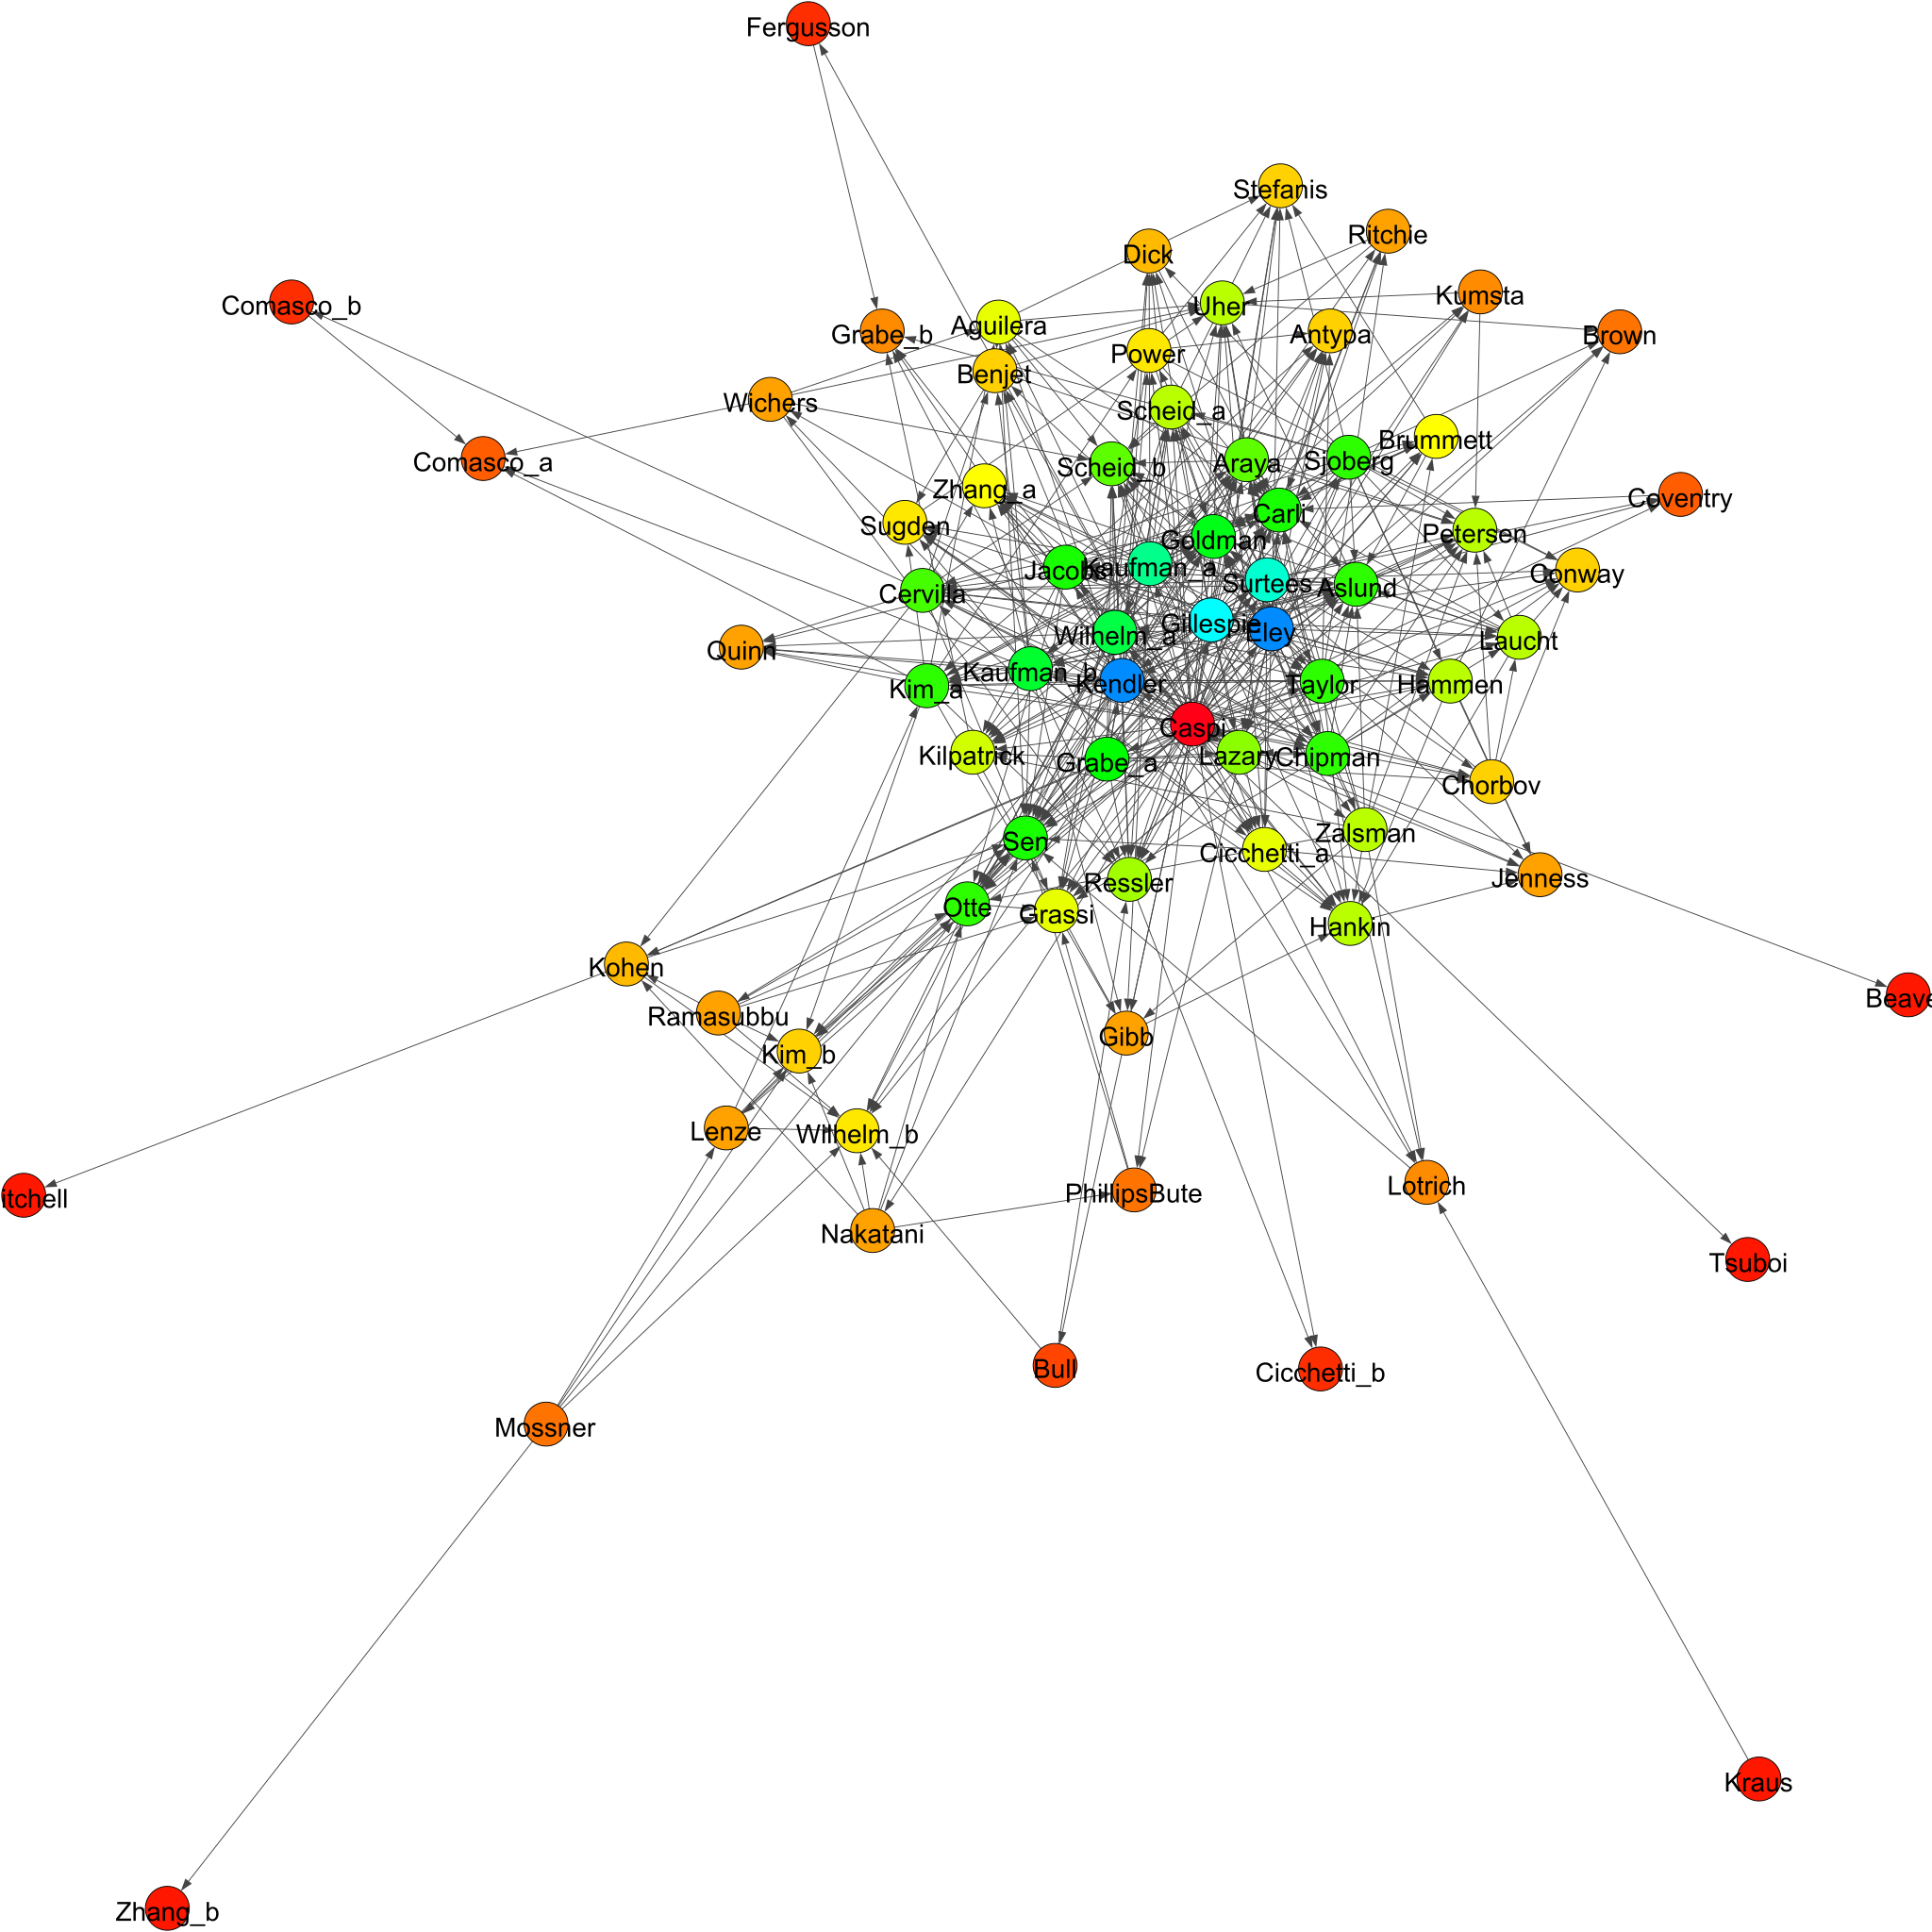

In [11]:
#plotting the graph
plot(g, out_name, **visual_style)